In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

file_path = 'upper_shuffled_output.xlsx'  
df = pd.read_excel(file_path)

X = df[['Frequency', 'S11 Amplitude', 'S21 Amplitude', 'S11 Phase', 'S21 Phase']]

y = df['pH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)


Accuracy: 87.19%
Classification Report:
              precision    recall  f1-score   support

           7       0.82      0.84      0.83      3008
           8       0.84      0.82      0.83      3060
           9       0.91      0.91      0.91      2975
          10       0.91      0.92      0.91      2959

    accuracy                           0.87     12002
   macro avg       0.87      0.87      0.87     12002
weighted avg       0.87      0.87      0.87     12002



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[7, 8, 9, 10], yticklabels=[7, 8, 9, 10])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the true vs predicted pH values for the first 100 test samples
plt.figure(figsize=(10, 5))
plt.plot(range(100), y_test[:100], label='True pH', marker='o')
plt.plot(range(100), y_pred[:100], label='Predicted pH', marker='x')
plt.title('True vs Predicted pH Values (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('pH Value')
plt.legend()
plt.show()


NameError: name 'y_test' is not defined

Mean Squared Error: 0.13
R² Score: 0.90


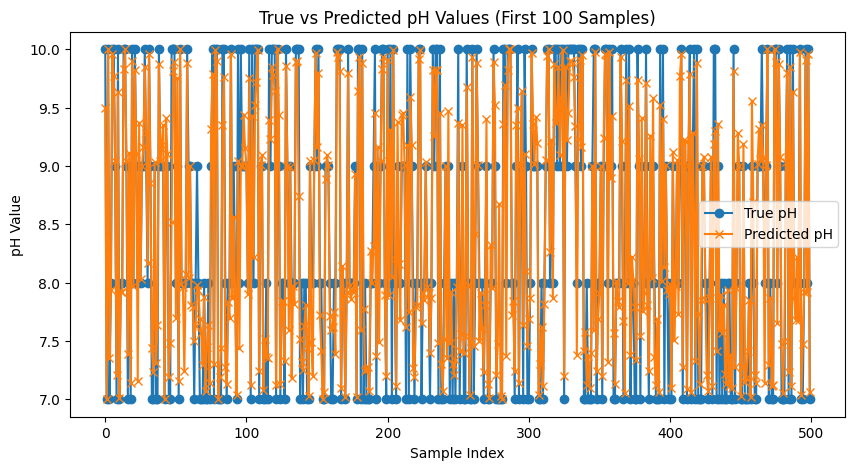

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

file_path = 'upper_shuffled_output.xlsx'  # Path to your file
df = pd.read_excel(file_path)
X = df[['Frequency', 'S11 Amplitude', 'S21 Amplitude', 'S11 Phase', 'S21 Phase']]

y = df['pH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_scaled, y_train)

y_pred = regressor.predict(X_test_scaled)

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot for first 100 samples
plt.figure(figsize=(10, 5))
plt.plot(range(500), y_test[:500], label='True pH', marker='o')
plt.plot(range(500), y_pred[:500], label='Predicted pH', marker='x')
plt.title('True vs Predicted pH Values (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('pH Value')
plt.legend()
plt.show()


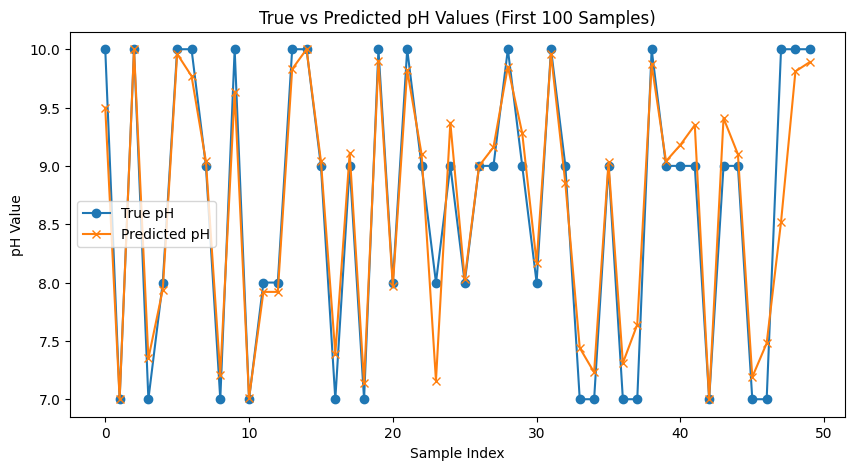

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(50), y_test[:50], label='True pH', marker='o')
plt.plot(range(50), y_pred[:50], label='Predicted pH', marker='x')
plt.title('True vs Predicted pH Values (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('pH Value')
plt.legend()
plt.show()